In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("netflix_titles.csv")
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

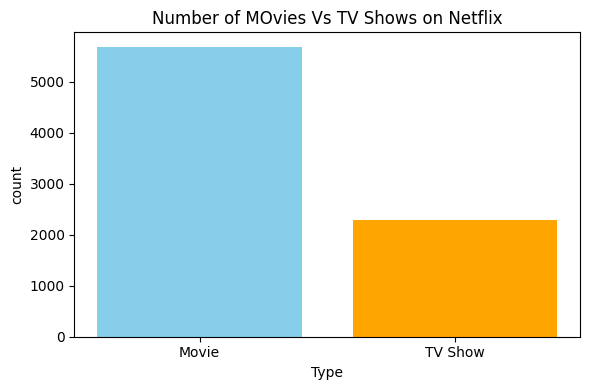

In [5]:
df = df.dropna(subset=['type','release_year','rating','country','duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.title('Number of MOvies Vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('count')
plt.tight_layout()
plt.savefig('movies_vs_tvShows.png')
plt.show()

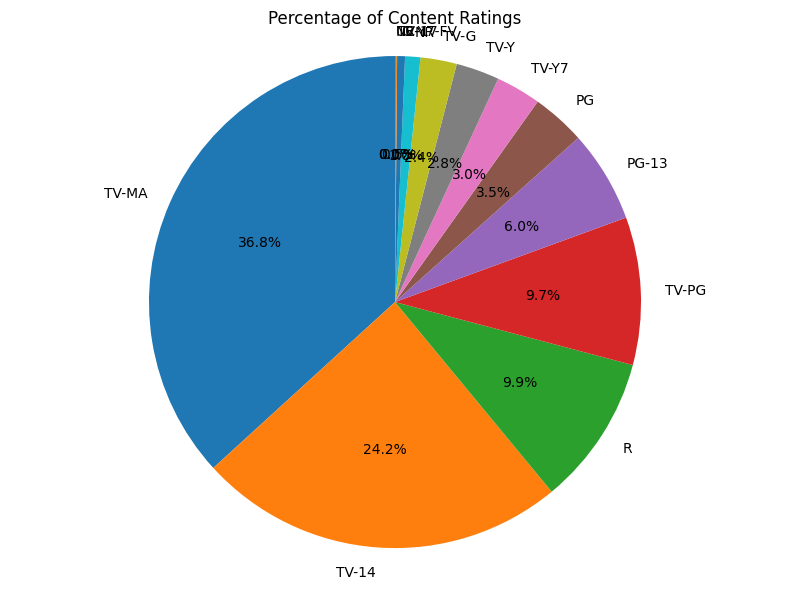

In [6]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Percentage of Content Ratings')
plt.axis('equal')
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()


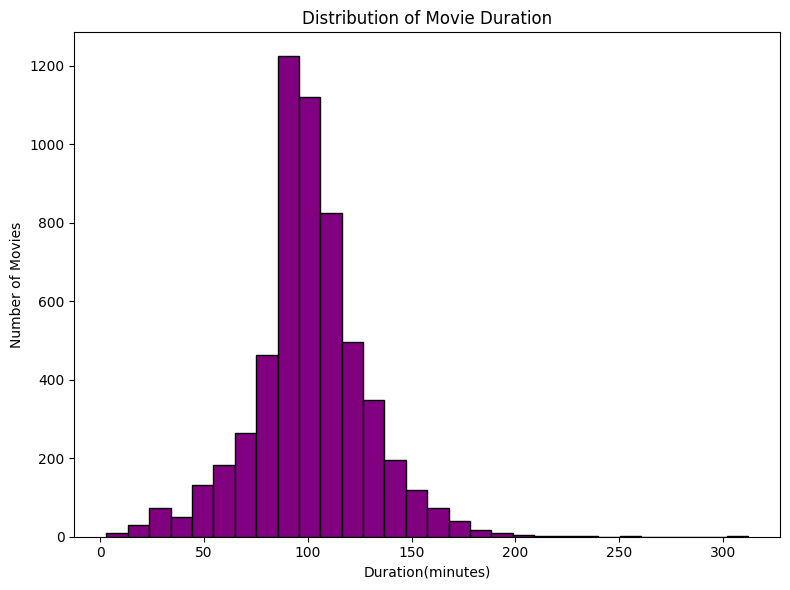

In [7]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize = (8,6))
plt.hist(movie_df['duration_int'],bins = 30, color = 'purple', edgecolor = 'black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration(minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('Movie_duration_histogram.png')
plt.show()




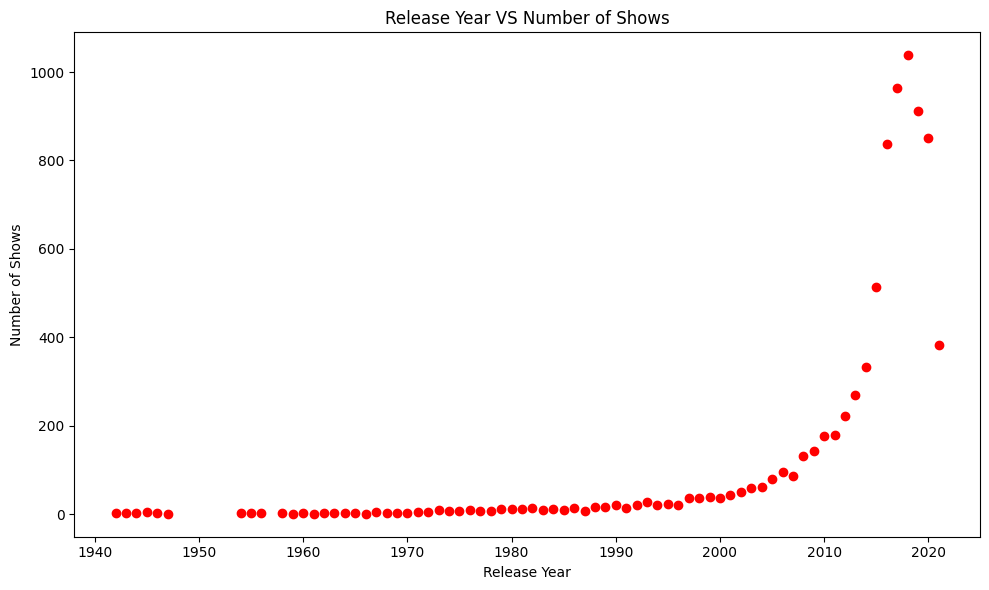

In [8]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index, release_counts.values , color = 'red')
plt.title("Release Year VS Number of Shows")
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show()

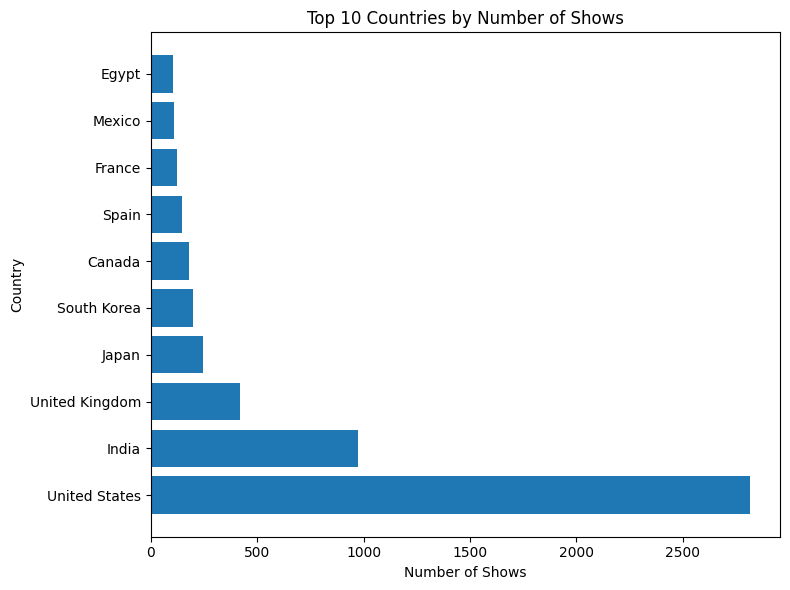

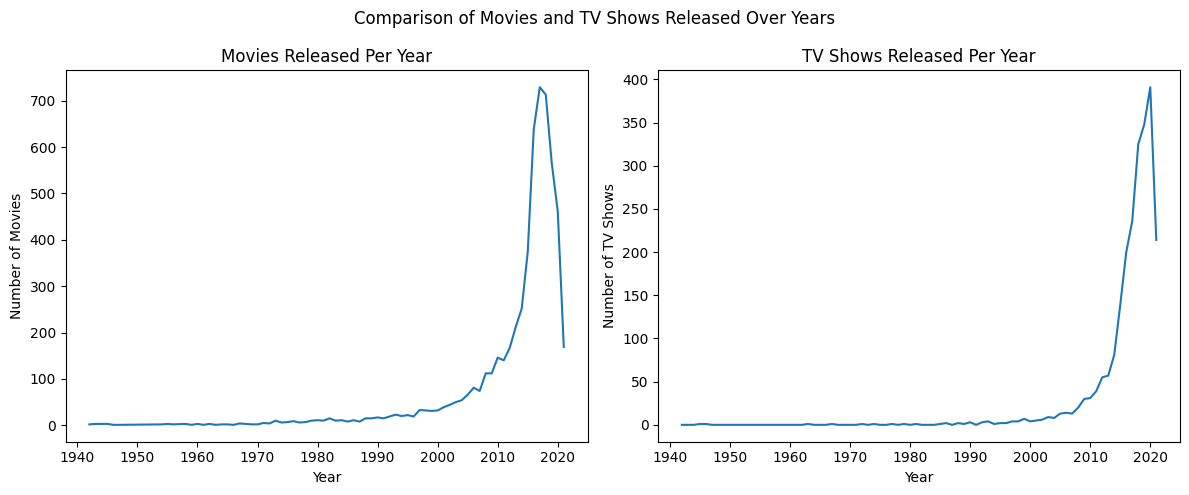

In [9]:
import matplotlib.pyplot as plt

# -------------------------------
# 1. Top 10 Countries by Number of Shows
# -------------------------------

country_counts = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(country_counts.index, country_counts.values)
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show()


# -------------------------------
# 2. Content Count by Year and Type
# -------------------------------

content_by_year = (
    df.groupby(['release_year', 'type'])
      .size()
      .unstack()
      .fillna(0)
)


# -------------------------------
# 3. Movies vs TV Shows Comparison
# -------------------------------

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Movies per year
ax[0].plot(content_by_year.index, content_by_year['Movie'])
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# TV Shows per year
ax[1].plot(content_by_year.index, content_by_year['TV Show'])
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()
